In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from utils import INPUT_SHAPE, batch_generator
import argparse
import os

Using TensorFlow backend.


In [2]:
np.random.seed(0)


In [3]:
def build_model(args):
    """
    Build the model
    """
    model = Sequential()
    model.add(Lambda(lambda x: x/127.5-1.0, input_shape=INPUT_SHAPE))
    model.add(Conv2D(24,5,5,activation='elu',subsample=(2,2)))
    model.add(Conv2D(36,5,5,activation='elu',subsample=(2,2)))
    model.add(Conv2D(48,5,5,activation='elu',subsample=(2,2)))
    model.add(Conv2D(64,3,3,activation='elu'))
    model.add(Conv2D(64,3,3,activation='elu'))
    model.add(Dropout(args["keep_prob"]))
    model.add(Flatten())
    model.add(Dense(100,activation='elu'))
    model.add(Dense(50,activation='elu'))
    model.add(Dense(10,activation='elu'))
    model.add(Dense(1))
    model.summary()

    return model

In [4]:
def load_data(args):
    """
    Load the training data and split into train and validation set
    """
    datadf = pd.read_csv(os.path.join(args["image_dir"], 'driving_log.csv'))
    X = datadf[['center', 'left', 'right']].values
    y = datadf['steering'].values
    X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=args["test_size"],random_state=0)
    return X_train, X_valid, y_train, y_valid


In [5]:
def train_model(model, args, X_train, X_valid, y_train, y_valid):
    """
    Train the model
    """
    chkpt = ModelCheckpoint('model-{epoch:03d}.h5',
                            monitor='val_loss',
                            verbose=0,
                            save_best_only=args["save_best_only"],
                            mode='auto')
    model.compile(loss='mean_squared_error',optimizer=Adam(lr=args["learning_rate"]))
    model.fit_generator(batch_generator(args["image_dir"], X_train, y_train,args["batch_size"],True),
                        args["samples_per_epoch"],
                        args["nb_epoch"],
                        max_q_size=1,
                        validation_data=batch_generator(args["image_dir"], X_valid, y_valid, args["batch_size"], False),
                        nb_val_samples=len(X_valid),
                        callbacks=[chkpt],
                        verbose=1)

In [6]:
args = {'image_dir': "data",
       'test_size': 0.2,
       "keep_prob":0.5,
       "nb_epoch":10,
       "samples_per_epoch":2000,
       "batch_size":40,
       "save_best_only":"true",
       "learning_rate":1.0e-4}

In [7]:
print('=' * 30)
print('Parameters')
print('=' * 30)
for key, value in args.items():
    print('{:<20} := {}'.format(key,value))
print('=' * 30)

Parameters
image_dir            := data
test_size            := 0.2
keep_prob            := 0.5
nb_epoch             := 10
samples_per_epoch    := 2000
batch_size           := 40
save_best_only       := true
learning_rate        := 0.0001


In [8]:
datadf = pd.read_csv(os.path.join(args["image_dir"], 'driving_log.csv'))
datadf.head()

,center,left,right,steering,throttle,break,speed
0,IMG\center_2018_04_15_00_22_14_024.jpg,IMG\left_2018_04_15_00_22_14_024.jpg,IMG\right_2018_04_15_00_22_14_024.jpg,0.0,0.0,0.0,0.000001
1,IMG\center_2018_04_15_00_22_14_100.jpg,IMG\left_2018_04_15_00_22_14_100.jpg,IMG\right_2018_04_15_00_22_14_100.jpg,0.0,0.0,0.0,0.000009
2,IMG\center_2018_04_15_00_22_14_174.jpg,IMG\left_2018_04_15_00_22_14_174.jpg,IMG\right_2018_04_15_00_22_14_174.jpg,0.0,0.0,0.0,0.000007
3,IMG\center_2018_04_15_00_22_14_247.jpg,IMG\left_2018_04_15_00_22_14_247.jpg,IMG\right_2018_04_15_00_22_14_247.jpg,0.0,0.0,0.0,0.000002
4,IMG\center_2018_04_15_00_22_14_324.jpg,IMG\left_2018_04_15_00_22_14_324.jpg,IMG\right_2018_04_15_00_22_14_324.jpg,0.0,0.0,0.0,0.000004


In [9]:
data = load_data(args)


In [10]:
import matplotlib.pyplot as plt


Image path: data\IMG\center_2018_04_15_00_22_14_100.jpg


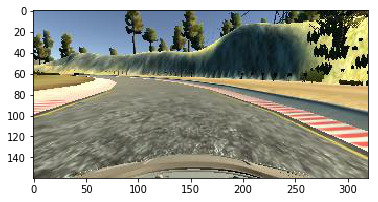

In [11]:
choosen_img = datadf['center'][1]
anyimage = os.path.join(args["image_dir"], choosen_img)
print("Image path: "+anyimage)
plt.imshow(plt.imread(anyimage))
plt.show()

In [ ]:
    model = build_model(args)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), activation="elu", strides=(2, 2))`
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  # This is added bac

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 66, 200, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 18, 64)         0         
__________

In [ ]:
train_model(model, args, *data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., 2000, 10, validation_data=<generator..., callbacks=[<keras.ca..., verbose=1, validation_steps=1596, max_queue_size=1)`


Epoch 1/10
 115/2000 [>.............................] - ETA: 2465s - loss: 0.1258